In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Web Scraping

In [2]:
chocolate_request=requests.get('https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html')
chocolate=chocolate_request.content
soup = BeautifulSoup(chocolate, "html.parser")

### Visualize Rating Distribution

In [3]:
rating_tag = soup.find_all(attrs={"class":"Rating"})
ratings=[]
for i in rating_tag[1:]:
    ratings.append(float(i.get_text()))

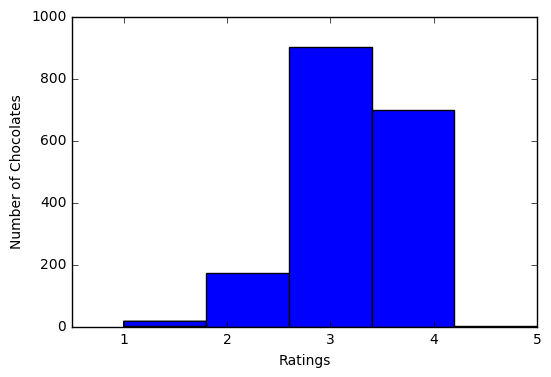

In [4]:
ax = plt.subplot()
plt.hist(ratings, bins=5,align= 'mid')
ax.set_xticks([1,2,3,4,5])
plt.xlabel('Ratings')
plt.ylabel("Number of Chocolates")
plt.show()

### Identify the 10 Largest Producers

In [5]:
company_tags = soup.find_all(attrs={"class":"Company"})
companies =[]
for i in company_tags[1:]:
    companies.append(i.get_text())

In [6]:
df = pd.DataFrame.from_dict({'companies': companies, 'ratings': ratings})
highest_rated=df.groupby('companies').ratings.mean().nlargest(10).reset_index()
highest_rated

,companies,ratings
0,Tobago Estate (Pralus),4.000000
1,Heirloom Cacao Preservation (Zokoko),3.875000
2,Ocelot,3.875000
3,Amedei,3.846154
4,Matale,3.812500
5,Patric,3.791667
6,Idilio (Felchlin),3.775000
7,Acalli,3.750000
8,Chocola'te,3.750000
9,Christopher Morel (Felchlin),3.750000


### Identify whether the highest rated bars have the most cocoa

In [7]:
cocoa_tag = soup.select(".CocoaPercent")
cocoa_percent = []
for i in cocoa_tag[1:]:
    cocoa_percent.append(int(float(i.get_text().strip('%'))))
df = pd.DataFrame.from_dict({'companies': companies, 'ratings': ratings, 'CocoaPercentage': cocoa_percent})

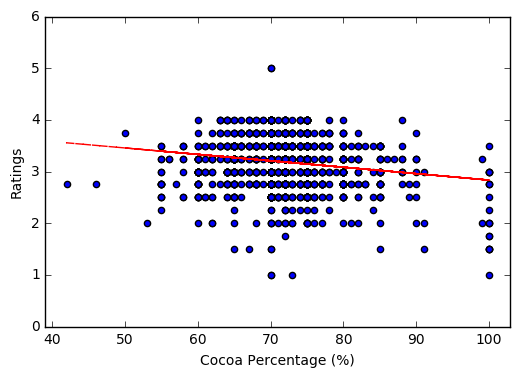

In [8]:
plt.scatter(df.CocoaPercentage, df.ratings)
ax =plt.subplot()
ax.set_xticks([40,50,60,70,80,90,100])
z = np.polyfit(df.CocoaPercentage, df.ratings, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.xlabel('Cocoa Percentage (%)')
plt.ylabel('Ratings')
plt.show()

### Where do the highest rated bars come from?

In [10]:
origin_tag=soup.select('.BroadBeanOrigin')
origin=[]
for i in origin_tag[1:]:
    origin.append(i.get_text())
df2= pd.DataFrame({'Origin': origin, 'ratings':ratings})
best_origins=df2.groupby('Origin').ratings.mean().nlargest(10).reset_index()
best_origins

,Origin,ratings
0,"Dom. Rep., Madagascar",4.00
1,"Gre., PNG, Haw., Haiti, Mad",4.00
2,"Guat., D.R., Peru, Mad., PNG",4.00
3,"Peru, Dom. Rep",4.00
4,"Ven, Bolivia, D.R.",4.00
5,"Venezuela, Java",4.00
6,"DR, Ecuador, Peru",3.75
7,"Dominican Rep., Bali",3.75
8,"PNG, Vanuatu, Mad",3.75
9,"Peru, Belize",3.75


### Which countries make the best bars?

In [11]:
company_location_tag = soup.select('.CompanyLocation')
company_location=[]
for i in company_location_tag[1:]:
    company_location.append(i.get_text())
df3=pd.DataFrame({'Location': company_location, 'ratings':ratings})
BestCompanies=df3.groupby('Location').ratings.mean().reset_index()

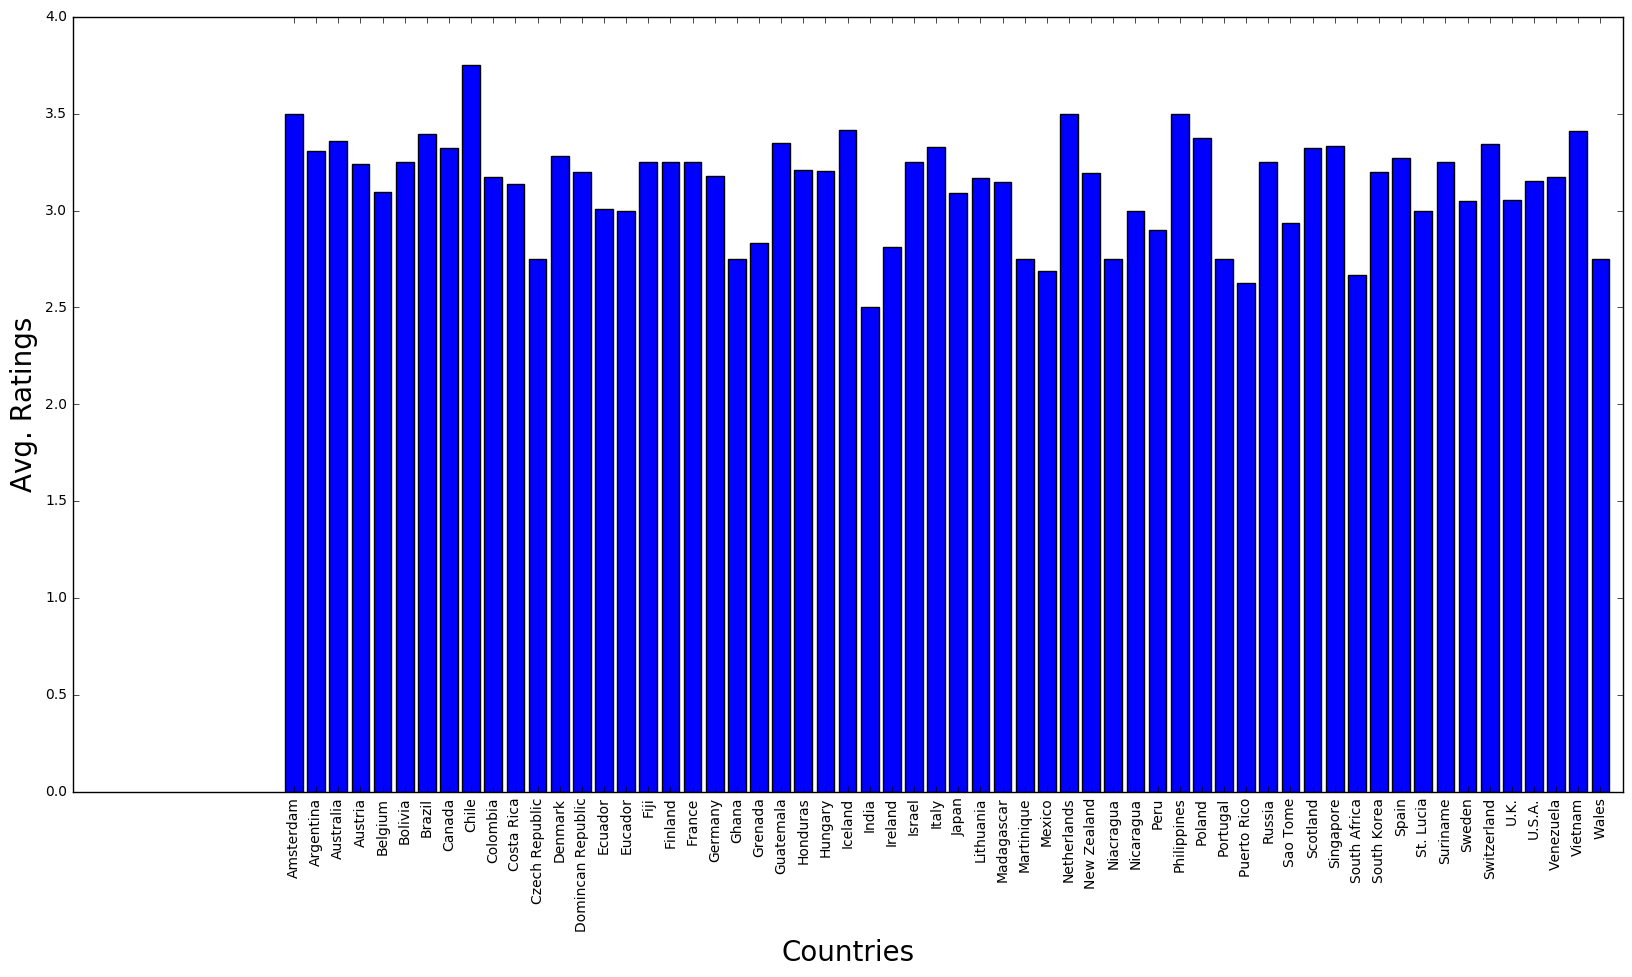

In [14]:
plt.figure(figsize=(20,10))
plt.bar(range(len(BestCompanies.Location)), BestCompanies.ratings, align="center")
ax = plt.subplot()
ax.set_xticks(range(len(BestCompanies)))
ax.set_xticklabels(BestCompanies.Location, rotation='vertical') 
plt.ylabel('Avg. Ratings',fontsize=20)
plt.xlabel('Countries', fontsize=20)
plt.show()